In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

df= pd.read_csv("./nasa.csv")
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [21]:
"""we can see most columns are just the same but in diffremt format (
km,m,feet..etc,plus the name and the ID wont help me much in my model"""
list=['Epoch Date Close Approach','Close Approach Date','Neo Reference ID', 'Name','Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)','Relative Velocity km per sec'
      ,'Miss Dist.(lunar)','Miss Dist.(miles)','Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
      'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time','Equinox','Miss Dist.(Astronomical)']
df=df.drop(columns=list)

<AxesSubplot:xlabel='Est Dia in KM(min)', ylabel='Hazardous'>

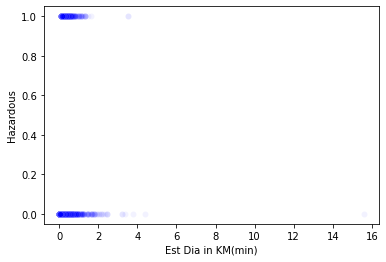

In [24]:
df
sns.scatterplot(x='Est Dia in KM(min)',y='Hazardous',data=df,alpha=0.05,color='b')

<AxesSubplot:>

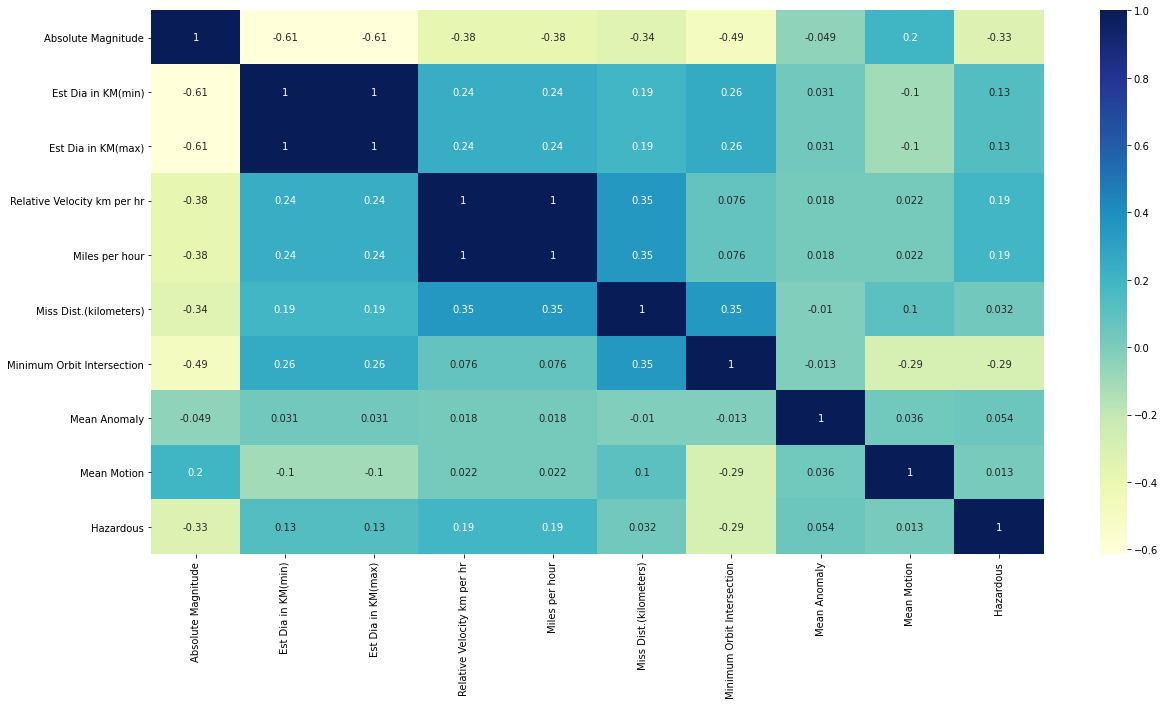

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

In [26]:
"""as we can see we here there is a strong corr between some of the features
so we can make them 1"""
df['est dia']=df['Est Dia in KM(max)']-df['Est Dia in KM(min)']
df['vel']=df['Relative Velocity km per sec']
df=df.drop(columns=['Est Dia in KM(max)','Est Dia in KM(min)','Relative Velocity km per sec','Miles per hour'])

0       0.157252
1       0.180550
2       0.286152
3       0.010879
4       0.157252
          ...   
4682    0.054525
4683    0.007527
4684    0.094754
4685    0.143416
4686    0.495219
Name: est dia, Length: 4687, dtype: float64